# Notebook of the first sesssion of the Python Study Group (28. Feb 2017)

## Introduction to astropy awesomeness. Examples for using astropy units, constants, tables, black body analytic functions, a tiiiiny bit of coordinates, and time objects. 

A lot more can be done with the modules shown here, this is just to give you a taste of what's out there. In case you get more into it, definitely check out the documentation on the astropy website for the specific module! I didn't go into any detail about the unit equivalencies available for example. The SkyCoords package is VERY powerful and maybe we will talk about that in particular in a later session? The Table module also can do many things not shown here, especially things like table operations (joining, merging) and so on may be of interest. 

In [121]:
from astropy import units as u

In [122]:
from astropy import constants as const

Reasons to use: 
- convenient, prevents unit conversion errors by the programmer / user
- allows implementation independant handling of various types of input data, you don't have to hard-code what is to be used (i.e. just provide the input data and unit, let the code take care of internally consistency)
- gives easy to understand errors when you try to convert stuff which is not convertible

In [123]:
1.*u.m

<Quantity 1.0 m>

In [124]:
1*u.m / u.s

<Quantity 1.0 m / s>

In [125]:
u.pc

Unit("pc")

In [126]:
import numpy as np

In [127]:
volume_earth = 4/3*np.pi*u.R_earth**3

In [128]:
volume_earth.decompose().cgs

<Quantity 1.0868508153121459e+27 cm3>

In [129]:
volume_earth.to(u.imperial.tsp)

<Quantity 2.2050478855594175e+26 tsp>

In [130]:
const.c

<Constant name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2010'>

In [131]:
volume_earth?

In [132]:
volume_earth.unit

Unit("earthRad3")

In [133]:
volume_earth.value

4.1887902047863905

In [134]:
from astropy.analytic_functions import blackbody_nu

In [135]:
wavelength = np.linspace(0.1,10,1000) * u.micron

In [136]:
wavelength

<Quantity [  0.1       ,  0.10990991,  0.11981982,  0.12972973,
             0.13963964,  0.14954955,  0.15945946,  0.16936937,
             0.17927928,  0.18918919,  0.1990991 ,  0.20900901,
             0.21891892,  0.22882883,  0.23873874,  0.24864865,
             0.25855856,  0.26846847,  0.27837838,  0.28828829,
             0.2981982 ,  0.30810811,  0.31801802,  0.32792793,
             0.33783784,  0.34774775,  0.35765766,  0.36756757,
             0.37747748,  0.38738739,  0.3972973 ,  0.40720721,
             0.41711712,  0.42702703,  0.43693694,  0.44684685,
             0.45675676,  0.46666667,  0.47657658,  0.48648649,
             0.4963964 ,  0.50630631,  0.51621622,  0.52612613,
             0.53603604,  0.54594595,  0.55585586,  0.56576577,
             0.57567568,  0.58558559,  0.5954955 ,  0.60540541,
             0.61531532,  0.62522523,  0.63513514,  0.64504505,
             0.65495495,  0.66486486,  0.67477477,  0.68468468,
             0.69459459,  0.7045045 ,  0

In [137]:
temperature = 5000*u.K

In [138]:
flux = blackbody_nu(wavelength, temperature)

In [139]:
flux

<Quantity [  1.26487847e-13,  1.27562245e-12,  8.58312274e-12,
             4.23486296e-11,  1.63898342e-10,  5.22739051e-10,
             1.42566614e-09,  3.41995228e-09,  7.37557209e-09,
             1.45488983e-08,  2.66131452e-08,  4.56474296e-08,
             7.40841052e-08,  1.14620759e-07,  1.70107646e-07,
             2.43423105e-07,  3.37349000e-07,  4.54456234e-07,
             5.97007627e-07,  7.66882490e-07,  9.65524638e-07,
             1.19391341e-06,  1.45255577e-06,  1.74149647e-06,
             2.06034299e-06,  2.40830157e-06,  2.78422109e-06,
             3.18664164e-06,  3.61384526e-06,  4.06390674e-06,
             4.53474263e-06,  5.02415754e-06,  5.52988650e-06,
             6.04963317e-06,  6.58110342e-06,  7.12203433e-06,
             7.67021862e-06,  8.22352489e-06,  8.77991372e-06,
             9.33745023e-06,  9.89431334e-06,  1.04488021e-05,
             1.09993394e-05,  1.15444738e-05,  1.20828794e-05,
             1.26133539e-05,  1.31348157e-05,  1.364630

In [140]:
flux.unit

Unit("erg / (cm2 Hz s sr)")

In [141]:
frequency = wavelength.to(u.Hz, equivalencies=u.spectral())

In [142]:
import matplotlib.pyplot as plt

In [143]:
%matplotlib inline

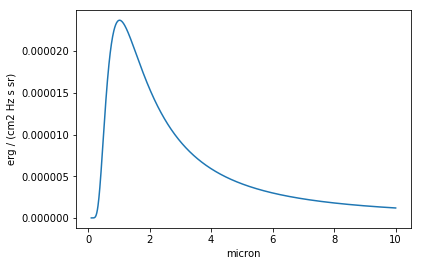

In [144]:
plt.xlabel(wavelength.unit)
plt.ylabel(flux.unit)
plt.plot(wavelength, flux)

In [145]:
from astropy.table import Table

In [146]:
t = Table(data=[wavelength, flux], names=['wavelength', 'flux'])

In [147]:
t['flux']

1.26487847425e-13
1.27562245057e-12
8.58312274098e-12
4.23486296209e-11
1.638983422e-10
5.22739050807e-10
1.42566614266e-09
3.41995227618e-09
7.37557208584e-09
1.45488983294e-08
2.66131452446e-08


In [148]:
t.write('new_test_table.txt', format='latex', overwrite=True)

In [149]:
t.write?

In [150]:
mask = np.logical_and.reduce((t['wavelength'] > 5*u.micron, t['wavelength'] < 10 * u.micron, t['flux']>0))

or:

In [151]:
mask = (t['wavelength'] > 5*u.micron) & (t['wavelength'] < 10 * u.micron) & (t['flux']>0)

In [152]:
t[mask]

wavelength,flux
micron,erg / (cm2 Hz s sr)
float64,float64
5.00540540541,4.07760273748e-06
5.01531531532,4.0640317504e-06
5.02522522523,4.05052719553e-06
5.03513513514,4.03708864981e-06
5.04504504505,4.02371569345e-06
5.05495495495,4.01040790986e-06
5.06486486486,3.99716488568e-06
5.07477477477,3.98398621072e-06


In [153]:
from astropy.io import ascii

In [154]:
ascii.write(t, output='table1_AAST.txt', Writer=ascii.AASTex, caption='lol', col_align='cc')

In [155]:
from astropy.coordinates import SkyCoord

To prevent the script from stopping when you don't have internet, let's use an exception!

In [159]:
try:
    target_coordinates = SkyCoord.from_name('M31')
except:  
    pass

It should be noted that the above is bad style! You don't want to make a blanket exception that catches anything that goes on and ignores it. Usually you would want to specify the type of error you expect and how to react if it appears... But in this case I really just want to ignore anything that goes wrong because it's only to prevent the script from stopping. ;p

In [163]:
try:
    print(target_coordinates.galactic)
# Catch exception in case target_coordinates is not defined.
except NameError:  
    print('Coordinates are not defined!')

Coordinates are not defined!


Like the above. :)

Make coordinate object by providing coordinates:

In [164]:
c1 = SkyCoord(2, 45.5, unit="deg")  # defaults to ICRS frame
c2 = SkyCoord(ra=[1, 2, 3], dec=[-30, 45, 8], frame="icrs", unit=(u.deg, u.deg))   

Using the second method above, you can easily feed for example the RA and DEC columns from a file to create a coordinate object which contains all of your targets and allows you to use all the powerful functions these objects provide (e.g., transformation of the coordinate frame, looking for separations or angles between objects). One example:

In [165]:
print(c1.separation(c2))  # Show separation of c1 for all c2-objects
close_object_mask = c1.separation(c2) < 50*u.arcmin  
print('Object within 50 arcmin of c1')
print(c2[close_object_mask])

['75d30m19.6963s' '0d30m00s' '37d30m35.8144s']
Object within 50 arcmin of c1
<SkyCoord (ICRS): (ra, dec) in deg
    ( 2.,  45.)>


Also works with u.arcsec, u.deg, u.radian and all other angle units in astropy

But LOOK AT DOCUMENTATION to get more info.


### Using grouping and aggregating in tables

In [166]:
obs = Table.read("""name    obs_date    mag_b  mag_v
                    M31     2012-01-02  17.0   17.5
                    M31     2012-01-02  17.1   17.4
                    M101    2012-01-02  15.1   13.5
                    M82     2012-02-14  16.2   14.5
                    M31     2012-02-14  16.9   17.3
                    M82     2012-02-14  15.2   15.5
                    M101    2012-02-14  15.0   13.6
                    M82     2012-03-26  15.7   16.5
                    M101    2012-03-26  15.1   13.5
                    M101    2012-03-26  14.8   14.3
                    """, format='ascii')

In [167]:
obs_by_name = obs.group_by('name')

In [168]:
obs_by_name.groups.keys

name
str4
M101
M31
M82


In [169]:
obs_by_name.groups.indices

array([ 0,  4,  7, 10])

In [170]:
obs_by_name.groups[0]

name,obs_date,mag_b,mag_v
str4,str10,float64,float64
M101,2012-01-02,15.1,13.5
M101,2012-02-14,15.0,13.6
M101,2012-03-26,15.1,13.5
M101,2012-03-26,14.8,14.3


In [171]:
obs_by_name.groups.aggregate(np.mean)

name,mag_b,mag_v
str4,float64,float64
M101,15.0,13.725
M31,17.0,17.4
M82,15.7,15.5


### Using the astropy time module

In [172]:
from astropy.time import Time
from astropy.time import TimeDelta

In [173]:
list(Time.FORMATS)

['jd',
 'mjd',
 'decimalyear',
 'unix',
 'cxcsec',
 'gps',
 'plot_date',
 'datetime',
 'iso',
 'isot',
 'yday',
 'fits',
 'byear',
 'jyear',
 'byear_str',
 'jyear_str']

In [174]:
obs_date = Time(obs['obs_date'])

In [175]:
obs_date

<Time object: scale='utc' format='iso' value=['2012-01-02 00:00:00.000' '2012-01-02 00:00:00.000'
 '2012-01-02 00:00:00.000' '2012-02-14 00:00:00.000'
 '2012-02-14 00:00:00.000' '2012-02-14 00:00:00.000'
 '2012-02-14 00:00:00.000' '2012-03-26 00:00:00.000'
 '2012-03-26 00:00:00.000' '2012-03-26 00:00:00.000']>

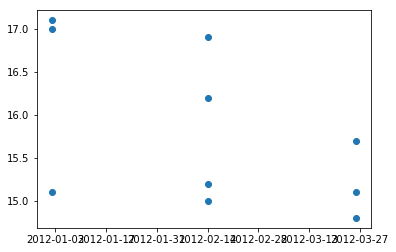

In [176]:
plt.plot_date(obs_date.plot_date, obs['mag_b'])

In [177]:
obs_date.format = 'mjd'
print(obs_date)

[ 55928.  55928.  55928.  55971.  55971.  55971.  55971.  56012.  56012.
  56012.]


These observations where actually conducted 10 minutes later!! My goodness, let's shift them to the proper time...

In [178]:
list(TimeDelta.FORMATS)

['sec', 'jd']

In [179]:
timeshift = TimeDelta(10*60, format = 'sec')

In [180]:
obs_date_shifted = obs_date + timeshift

In [181]:
obs_date

<Time object: scale='utc' format='mjd' value=[ 55928.  55928.  55928.  55971.  55971.  55971.  55971.  56012.  56012.
  56012.]>

You can easily also perform operations on Time objects. Doing a subtraction of two time objects will return a TimeDelta object which shows the time difference, regardless of whether you have them in year-month-day format or whatever.

In [182]:
time_difference = obs_date_shifted - obs_date

In [183]:
time_difference

<TimeDelta object: scale='tai' format='jd' value=[ 0.00694444  0.00694444  0.00694444  0.00694444  0.00694444  0.00694444
  0.00694444  0.00694444  0.00694444  0.00694444]>

In [184]:
time_difference.format = 'sec'

In [185]:
time_difference

<TimeDelta object: scale='tai' format='sec' value=[ 600.  600.  600.  600.  600.  600.  600.  600.  600.  600.]>